In [166]:
# import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [167]:
# read the training set 
df_train = pd.read_csv('./crime-cast-forecasting-crime-categories/train.csv')

df_train

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,34.0334,-118.3523,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,34.0571,-118.3815,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,33.7451,-118.2835,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Crimes against Public Order


In [168]:
# check for literal values in the training set 
df_train.dtypes

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object

In [169]:
# print the unique values in the training set for all columns
for col in df_train.columns:
    print(col, df_train[col].unique())

Location ['4500    CARPENTER                    AV'
 '45TH                         ST'
 '600 E  MARTIN LUTHER KING JR        BL' ...
 '15800    STRATHERN                    ST'
 '5100 W  ADAMS                        BL'
 'DALTON                       AV']
Cross_Street [nan 'ALAMEDA                      ST' 'LASSEN                       ST'
 ... 'VICTORIA' '39TH                         ST' 'HAVELOCK']
Latitude [34.1522 34.0028 34.0111 ... 33.7961 33.822  33.7173]
Longitude [-118.391  -118.2391 -118.2653 ... -118.516  -118.4944 -118.5285]
Date_Reported ['03/09/2020 12:00:00 AM' '02/27/2020 12:00:00 AM'
 '08/21/2020 12:00:00 AM' '11/08/2020 12:00:00 AM'
 '02/25/2020 12:00:00 AM' '01/10/2020 12:00:00 AM'
 '08/17/2020 12:00:00 AM' '10/07/2021 12:00:00 AM'
 '01/28/2020 12:00:00 AM' '07/07/2020 12:00:00 AM'
 '01/21/2020 12:00:00 AM' '06/11/2020 12:00:00 AM'
 '02/03/2020 12:00:00 AM' '02/22/2020 12:00:00 AM'
 '07/31/2020 12:00:00 AM' '09/08/2020 12:00:00 AM'
 '06/25/2020 12:00:00 AM' '09/11/20

In [170]:
# check for missing values in the training set
df_train.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [171]:
# # remove the missing values in the training set
# df_train = df_train.dropna()

# df_train.isnull().sum()

In [172]:
# fill the missing values in the training set with the median value if the column is numerical and Unknown if the column is categorical
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        df_train[col] = df_train[col].fillna('Unknown')
    else:
        df_train[col] = df_train[col].fillna(df_train[col].median())

df_train.isnull().sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
Crime_Category           0
dtype: int64

In [173]:
df_train.dtypes

Location                  object
Cross_Street              object
Latitude                 float64
Longitude                float64
Date_Reported             object
Date_Occurred             object
Time_Occurred            float64
Area_ID                  float64
Area_Name                 object
Reporting_District_no    float64
Part 1-2                 float64
Modus_Operandi            object
Victim_Age               float64
Victim_Sex                object
Victim_Descent            object
Premise_Code             float64
Premise_Description       object
Weapon_Used_Code         float64
Weapon_Description        object
Status                    object
Status_Description        object
Crime_Category            object
dtype: object

In [174]:
# get all the columns that don't have numerical values (dtype as object)
categorical_columns = [col for col in df_train.columns if df_train[col].dtype == 'object']

categorical_columns

['Location',
 'Cross_Street',
 'Date_Reported',
 'Date_Occurred',
 'Area_Name',
 'Modus_Operandi',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Description',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

In [175]:
# convert the categorical columns to numerical values by label encoding and label encode NaN values as well

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_columns:
    if col != 'Crime_Category':
        df_train[col] = le.fit_transform(df_train[col])

df_train

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,7238,1325,34.1522,-118.3910,192,65,1800.0,15.0,8,1563.0,...,75.0,2,15,101.0,186,400.0,55,2,2,Property Crimes
1,7300,167,34.0028,-118.2391,160,57,1345.0,13.0,9,1367.0,...,41.0,2,6,216.0,188,400.0,47,2,2,Property Crimes
2,8525,1325,34.0111,-118.2653,568,233,605.0,13.0,9,1343.0,...,67.0,2,1,501.0,177,400.0,55,2,2,Property Crimes
3,2879,1325,34.2953,-118.4590,712,310,1800.0,19.0,7,1924.0,...,61.0,2,6,101.0,186,400.0,55,2,2,Property Crimes
4,9584,1325,33.9787,-118.2918,155,55,1130.0,12.0,0,1245.0,...,0.0,4,16,401.0,88,400.0,47,2,2,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7868,1325,34.0334,-118.3523,379,144,700.0,3.0,15,303.0,...,51.0,2,6,501.0,177,400.0,47,2,2,Violent Crimes
19996,3555,1325,34.2212,-118.5011,800,359,259.0,10.0,19,1008.0,...,0.0,2,15,301.0,63,400.0,55,2,2,Property Crimes
19997,441,1325,34.0571,-118.3815,632,268,1400.0,8.0,18,849.0,...,42.0,2,6,102.0,176,400.0,55,2,2,Property Crimes
19998,5975,1325,33.7451,-118.2835,418,161,600.0,5.0,4,558.0,...,76.0,0,6,501.0,177,400.0,55,2,2,Crimes against Public Order


In [176]:
# Seprately label encode the target column
label_encoder = LabelEncoder()

df_train['Crime_Category'] = label_encoder.fit_transform(df_train['Crime_Category'])

df_train

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,7238,1325,34.1522,-118.3910,192,65,1800.0,15.0,8,1563.0,...,75.0,2,15,101.0,186,400.0,55,2,2,4
1,7300,167,34.0028,-118.2391,160,57,1345.0,13.0,9,1367.0,...,41.0,2,6,216.0,188,400.0,47,2,2,4
2,8525,1325,34.0111,-118.2653,568,233,605.0,13.0,9,1343.0,...,67.0,2,1,501.0,177,400.0,55,2,2,4
3,2879,1325,34.2953,-118.4590,712,310,1800.0,19.0,7,1924.0,...,61.0,2,6,101.0,186,400.0,55,2,2,4
4,9584,1325,33.9787,-118.2918,155,55,1130.0,12.0,0,1245.0,...,0.0,4,16,401.0,88,400.0,47,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7868,1325,34.0334,-118.3523,379,144,700.0,3.0,15,303.0,...,51.0,2,6,501.0,177,400.0,47,2,2,5
19996,3555,1325,34.2212,-118.5011,800,359,259.0,10.0,19,1008.0,...,0.0,2,15,301.0,63,400.0,55,2,2,4
19997,441,1325,34.0571,-118.3815,632,268,1400.0,8.0,18,849.0,...,42.0,2,6,102.0,176,400.0,55,2,2,4
19998,5975,1325,33.7451,-118.2835,418,161,600.0,5.0,4,558.0,...,76.0,0,6,501.0,177,400.0,55,2,2,1


<AxesSubplot:>

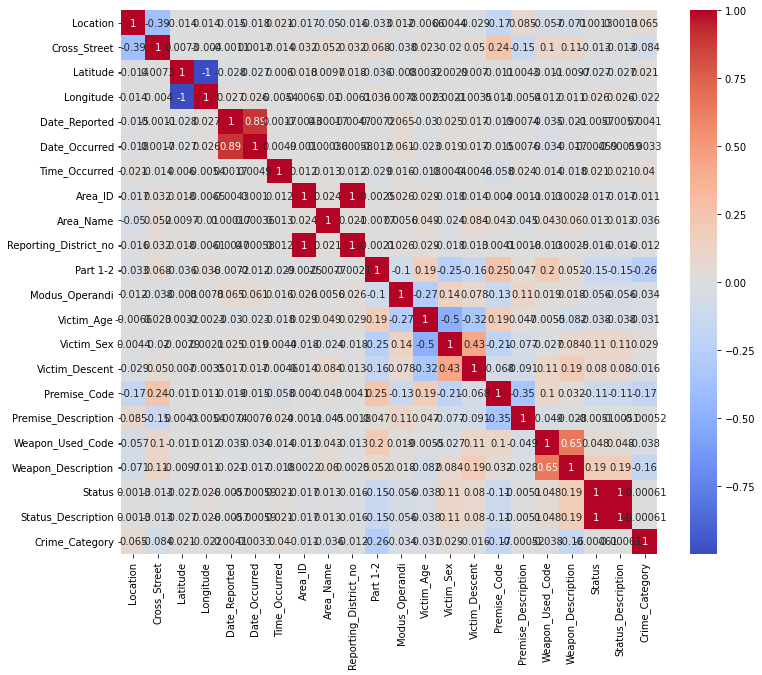

In [177]:
# plot a correlation matrix
import seaborn as sns

corr = df_train.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [178]:
# split the training set into features and target variable
X = df_train.drop('Crime_Category', axis=1)
y = df_train['Crime_Category']

In [179]:
df_test = pd.read_csv('./crime-cast-forecasting-crime-categories/test.csv')

df_test

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,...,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,...,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,...,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,...,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


In [180]:
# fill the missing values in the test set with the median value if the column is numerical and Unknown if the column is categorical
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = df_test[col].fillna('Unknown')
    else:
        df_test[col] = df_test[col].fillna(df_test[col].median())

df_test.isnull().sum()

Location                 0
Cross_Street             0
Latitude                 0
Longitude                0
Date_Reported            0
Date_Occurred            0
Time_Occurred            0
Area_ID                  0
Area_Name                0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Premise_Description      0
Weapon_Used_Code         0
Weapon_Description       0
Status                   0
Status_Description       0
dtype: int64

In [181]:
# convert the categorical columns to numerical values by label encoding and apply the label encoder for NaN values too
for col in categorical_columns:
    if col in df_test.columns:
        df_test[col] = le.fit_transform(df_test[col])

df_test

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,971,472,34.0128,-118.3045,110,62,2000.0,3.0,15,376.0,...,994,28.0,0,5,501.0,117,400.0,42,2,2
1,64,472,34.0726,-118.3029,240,115,1700.0,20.0,11,2014.0,...,469,26.0,2,1,502.0,87,400.0,51,2,2
2,1861,472,33.9348,-118.2695,352,239,900.0,18.0,14,1844.0,...,2493,62.0,0,1,721.0,50,400.0,51,2,2
3,712,472,34.0497,-118.3442,501,337,2200.0,7.0,20,765.0,...,2961,0.0,3,12,108.0,100,400.0,51,2,2
4,366,472,34.1611,-118.3704,354,241,130.0,15.0,8,1555.0,...,2103,37.0,0,14,501.0,117,400.0,51,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2402,472,34.0409,-118.3408,246,155,2100.0,7.0,20,775.0,...,2961,0.0,3,12,101.0,124,400.0,51,2,2
4996,1628,472,34.0347,-118.2253,475,329,1530.0,4.0,5,471.0,...,1823,0.0,4,15,116.0,98,400.0,51,2,2
4997,3945,469,34.2392,-118.4698,463,325,2100.0,19.0,7,1961.0,...,1507,38.0,2,5,101.0,124,400.0,42,0,0
4998,2180,472,34.0453,-118.2443,107,59,2335.0,1.0,1,147.0,...,920,41.0,2,1,502.0,87,500.0,50,1,1


In [182]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a logestic regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_val)

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

accuracy

c:\Python\Python390\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.58375

In [183]:
# make predictions on the test set
y_test = log_reg.predict(df_test)

y_test

array([4, 4, 2, ..., 4, 4, 4])

In [184]:
# convert the predictions to the original labels
y_test = label_encoder.inverse_transform(y_test)

y_test

array(['Property Crimes', 'Property Crimes',
       'Fraud and White-Collar Crimes', ..., 'Property Crimes',
       'Property Crimes', 'Property Crimes'], dtype=object)

In [185]:
# create a submission file with 'ID' from 1 to length of y_test and 'Crime_Category' as the predictions

submission = pd.DataFrame({'ID': range(1, len(y_test)+1), 'Crime_Category': y_test})

submission.to_csv('submission.csv', index=False)

In [186]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# make predictions on the validation set
y_pred = rf.predict(X_val)

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

accuracy

0.89525

In [187]:
# make predictions on the test set
y_test = rf.predict(df_test)

# convert the predictions to the original labels

y_test = label_encoder.inverse_transform(y_test)

y_test

array(['Violent Crimes', 'Property Crimes', 'Violent Crimes', ...,
       'Violent Crimes', 'Property Crimes', 'Violent Crimes'],
      dtype=object)

In [188]:
# create a submission file with 'ID' from 1 to length of y_test and 'Crime_Category' as the predictions

submission = pd.DataFrame({'ID': range(1, len(y_test)+1), 'Crime_Category': y_test})

submission.to_csv('submission.csv', index=False)

submission

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Violent Crimes
3,4,Property Crimes
4,5,Violent Crimes
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Property Crimes


In [189]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a xgboost classifier
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42)

xgb.fit(X_train, y_train)

# make predictions on the validation set
y_pred = xgb.predict(X_val)

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

accuracy

0.91775

In [190]:
# make predictions on the test set
y_test = xgb.predict(df_test)

# convert the predictions to the original labels

y_test = label_encoder.inverse_transform(y_test)

y_test

array(['Violent Crimes', 'Property Crimes', 'Violent Crimes', ...,
       'Violent Crimes', 'Property Crimes', 'Violent Crimes'],
      dtype=object)

In [191]:
# create a submission file with 'ID' from 1 to length of y_test and 'Crime_Category' as the predictions

submission = pd.DataFrame({'ID': range(1, len(y_test)+1), 'Crime_Category': y_test})

submission.to_csv('submission.csv', index=False)

submission

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Violent Crimes
3,4,Violent Crimes
4,5,Violent Crimes
...,...,...
4995,4996,Violent Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Property Crimes


In [192]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a lightgbm classifier

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, random_state=42)

lgbm.fit(X_train, y_train)

# make predictions on the validation set

y_pred = lgbm.predict(X_val)

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

accuracy

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2795
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 21
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394


0.9195

In [193]:
# make predictions on the test set

y_test = lgbm.predict(df_test)

# convert the predictions to the original labels

y_test = label_encoder.inverse_transform(y_test)

y_test

array(['Property Crimes', 'Property Crimes', 'Violent Crimes', ...,
       'Violent Crimes', 'Property Crimes', 'Violent Crimes'],
      dtype=object)

In [194]:
# create a submission file with 'ID' from 1 to length of y_test and 'Crime_Category' as the predictions

submission = pd.DataFrame({'ID': range(1, len(y_test)+1), 'Crime_Category': y_test})

submission.to_csv('submission.csv', index=False)

submission

,ID,Crime_Category
0,1,Property Crimes
1,2,Property Crimes
2,3,Violent Crimes
3,4,Violent Crimes
4,5,Violent Crimes
...,...,...
4995,4996,Violent Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Property Crimes


In [195]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)

# make predictions on the validation set
y_pred = dt.predict(X_val)

# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

accuracy

0.8835

In [196]:
# make predictions on the test set

y_test = dt.predict(df_test)

# convert the predictions to the original labels

y_test = label_encoder.inverse_transform(y_test)

y_test

array(['Property Crimes', 'Property Crimes', 'Violent Crimes', ...,
       'Violent Crimes', 'Property Crimes', 'Property Crimes'],
      dtype=object)

In [197]:
# create a submission file with 'ID' from 1 to length of y_test and 'Crime_Category' as the predictions

submission = pd.DataFrame({'ID': range(1, len(y_test)+1), 'Crime_Category': y_test})

submission.to_csv('submission.csv', index=False)

submission

,ID,Crime_Category
0,1,Property Crimes
1,2,Property Crimes
2,3,Violent Crimes
3,4,Violent Crimes
4,5,Property Crimes
...,...,...
4995,4996,Property Crimes
4996,4997,Violent Crimes
4997,4998,Violent Crimes
4998,4999,Property Crimes


In [198]:
# split the training set into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train a knn classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

# make predictions on the validation set

y_pred = knn.predict(X_val)

# evaluate the model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)

accuracy

AttributeError: 'Flags' object has no attribute 'c_contiguous'